In [1]:
# %load_ext autoreload
# %autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '.')))

import numpy as np
import matplotlib.pyplot as plt
import pickle, datetime

from analyzer import Analyzer

In [2]:
PATHNAME = ["/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
            "/home/hengji/Documents/hydra/videos/EGCaMP_ctrl_30mins_40x_10fps_mv1.avi",
            "/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a2_25x10fps_30mins.avi",
            "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi",
            "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi", 
            "/home/hengji/Documents/hydra/videos/Pre_Bisect_40x_4fps_ex4.avi",
            "/home/hengji/Documents/hydra/videos/Copy of NGCaMP6_50X_20fps_M1.avi"]
FPS = [10, 10, 10, 10, 10, 4, 20]

In [3]:
# Create an analyzer
# anlzr = Analyzer()

# Or... Import a saved one
anlzr = pickle.load(open("./objects/2020-04-01-23-24.txt", "rb"))

In [4]:
# Add video to the analyzer
anlzr.add_videos(pathname=PATHNAME, fps=FPS)

In [5]:
# Check the added videos
anlzr.videos()

Control-EGCaMP_exp1_a1_30x10fps_5%.avi
EGCaMP_ctrl_30mins_40x_10fps_mv1.avi
Control-EGCaMP_exp1_a2_25x10fps_30mins.avi
EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi
EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi
Pre_Bisect_40x_4fps_ex4.avi
Copy of NGCaMP6_50X_20fps_M1.avi


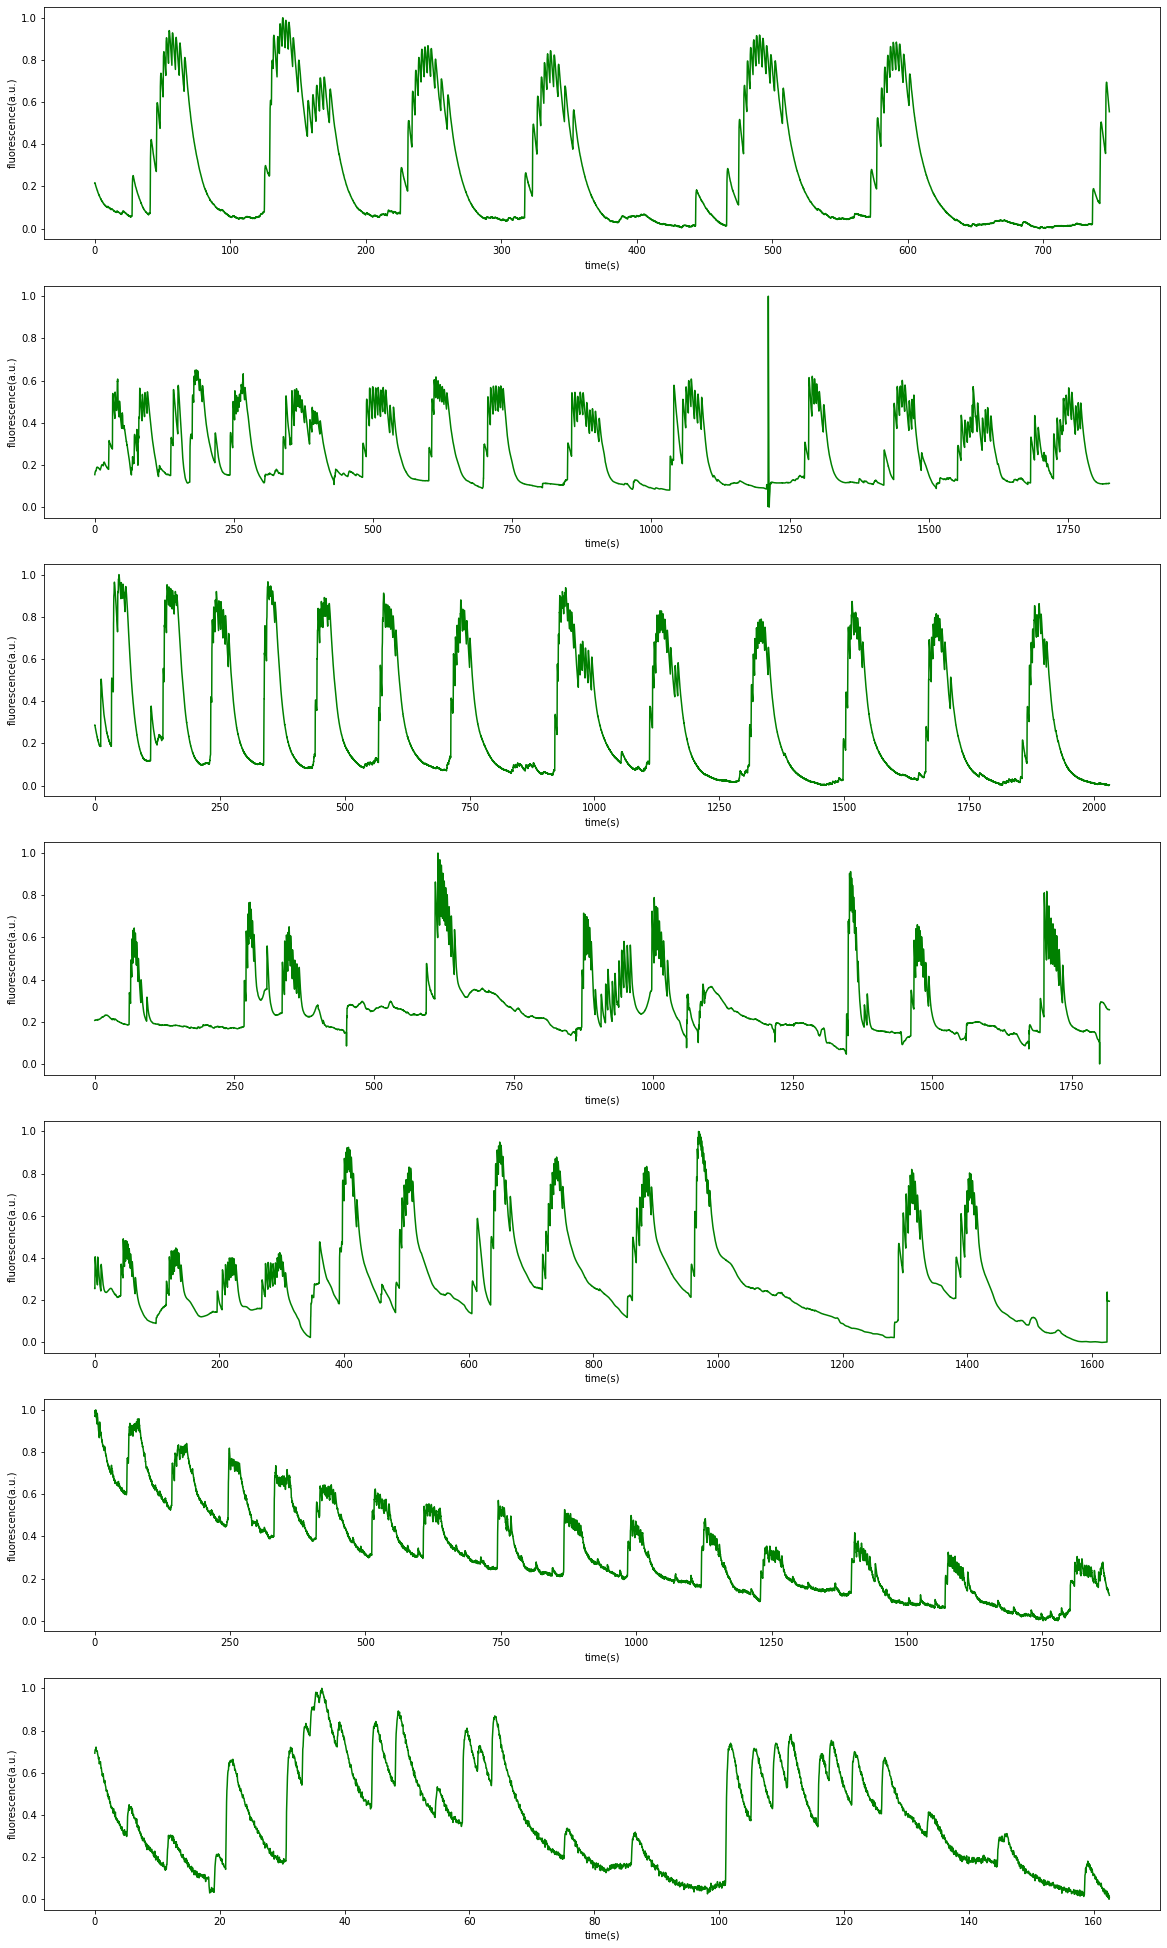

In [6]:
# Trace the fluorescences
anlzr.trace_fluos(normalized=True, 
                  display=False, 
                  plot=True)

In [14]:
# Delete video
anlzr.delete_video("Copy of NGCaMP6_50X_20fps_M1.avi")
anlzr.videos()

Control-EGCaMP_exp1_a1_30x10fps_5%.avi
EGCaMP_ctrl_30mins_40x_10fps_mv1.avi
Control-EGCaMP_exp1_a2_25x10fps_30mins.avi
EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi
EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi
Pre_Bisect_40x_4fps_ex4.avi


In [15]:
# Find peaks
anlzr.find_peaks(plot=False,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

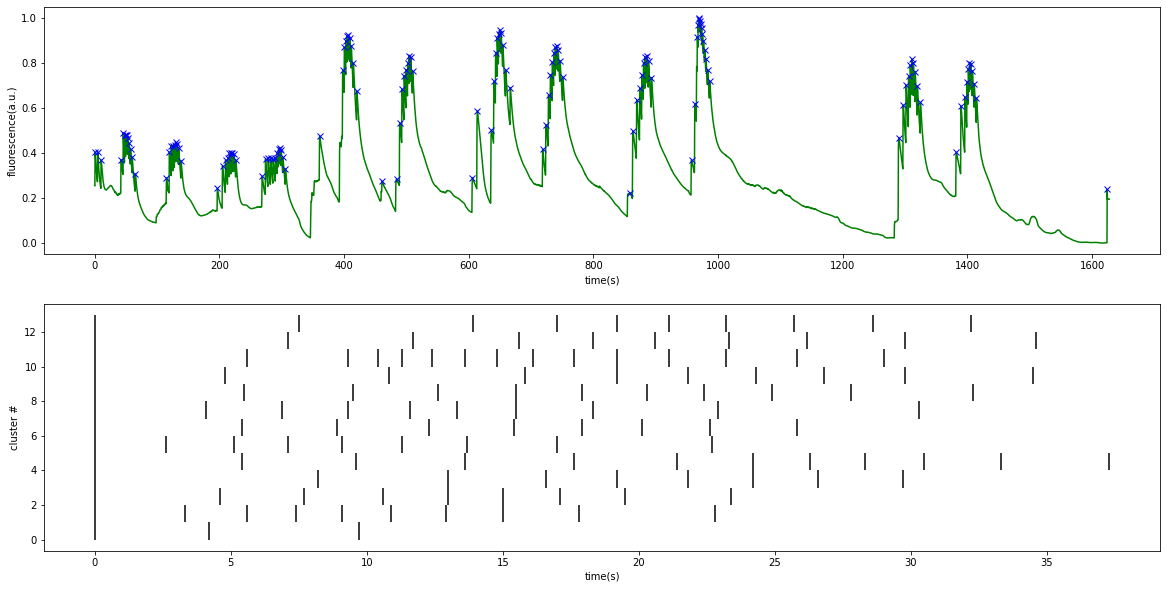

In [21]:
# Find peaks of a specific video
anlzr.find_peaks(name="EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi",
                plot=True,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

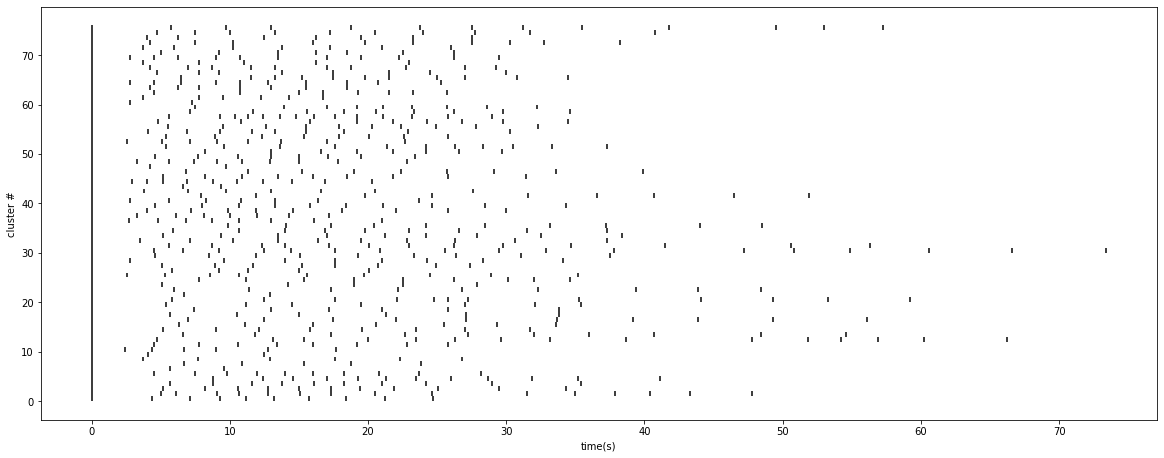

In [17]:
# Plot all spike trains
anlzr.plot_spike_trains()

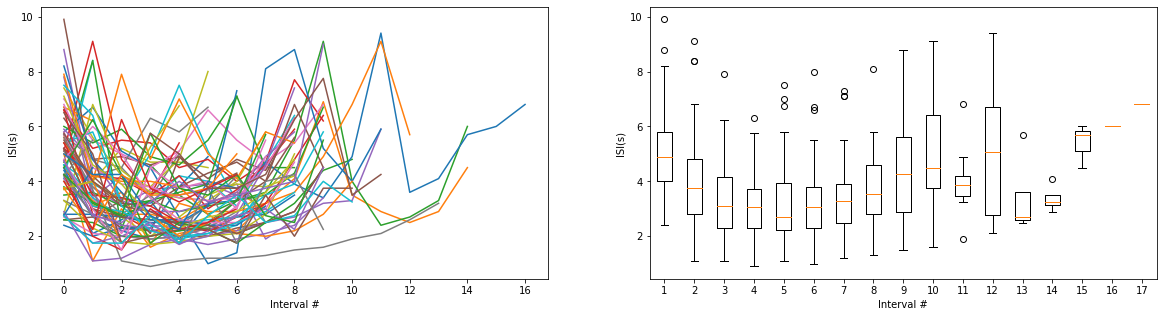

In [18]:
# Plot the statistics of ISI
anlzr.stat_isi()

In [19]:
# Save anlzr
filename = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
filehandler = open("./objects/" + filename + ".txt", 'wb') 
pickle.dump(anlzr, filehandler)